In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

In [3]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    
    return model

In [4]:
def train(model, x_train, y_train, x_test, y_test):
    # Train the model
    history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=1)

    return history

In [5]:
def plot_training_history(history, test_loss, test_accuracy):
    # Extract data from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
    plt.title('Training, Validation, and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.axhline(y=test_loss, color='g', linestyle='--', label='Test Loss')
    plt.title('Training, Validation, and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix(model, x_test, y_test):
    # Get predictions for the test set
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class indices
    y_true = np.argmax(y_test, axis=1)          # Convert one-hot labels to class indices

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Confusion Matrix")
    plt.show()

In [6]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()
history = train(model, x_train, y_train, x_test, y_test)

Epoch 1/20


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8079 - loss: 0.6109 - val_accuracy: 0.9585 - val_loss: 0.1326
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9570 - loss: 0.1390 - val_accuracy: 0.9701 - val_loss: 0.0983
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9713 - loss: 0.0940 - val_accuracy: 0.9720 - val_loss: 0.0889
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9786 - loss: 0.0708 - val_accuracy: 0.9747 - val_loss: 0.0832
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9818 - loss: 0.0595 - val_accuracy: 0.9747 - val_loss: 0.0879
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0465 - val_accuracy: 0.9769 - val_loss: 0.0825
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9851 - loss: 0.0433 - val_accuracy: 0.9762 - val_loss: 0.0907
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9778 - val_

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

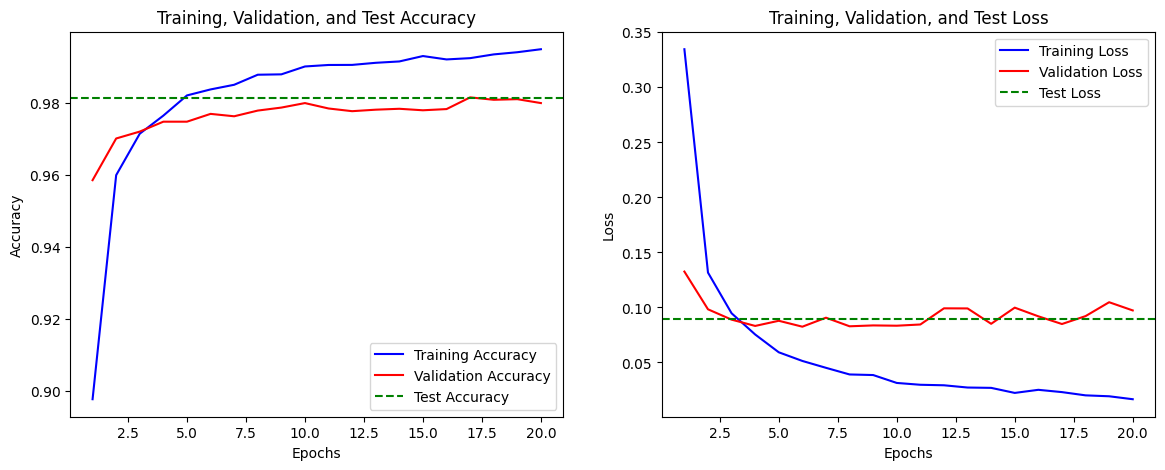

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
plot_training_history(history, test_loss, test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


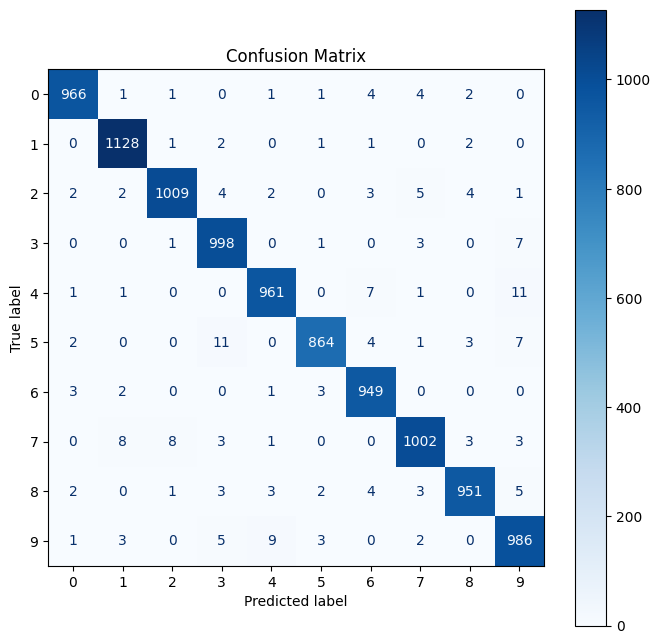

In [9]:
plot_confusion_matrix(model, x_test, y_test)